In [1]:
# ------------------------------
# Step 1: Import Libraries
# ------------------------------
import pandas as pd
import yfinance as yf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
# ------------------------------
# Step 2: Fetch and Prepare Stock Data
# ------------------------------

# Set the date range
start_date = '2003-01-01'
end_date = '2021-12-31'

# Fetch data for Microsoft (MSFT)
msft = yf.Ticker('MSFT')
stock_data_msft = msft.history(start=start_date, end=end_date)

# Check if the stock data has multi-level columns
if isinstance(stock_data_msft.columns, pd.MultiIndex):
    print("Multi-level columns detected in stock data. Flattening columns...")
    stock_data_msft.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in stock_data_msft.columns]
else:
    print("Single-level columns detected in stock data.")

# Remove the timezone from the index
stock_data_msft.index = stock_data_msft.index.tz_localize(None)

# Reset index to make 'Date' a regular column
stock_data_msft.reset_index(inplace=True)

# Convert 'Date' column to datetime
stock_data_msft['Date'] = pd.to_datetime(stock_data_msft['Date'])

# ------------------------------
# Step 4: Load and Merge Stock and News Data
# ------------------------------
news_data = pd.read_csv('cleaned_business_news_with_vader.csv')
news_data['publish_date'] = pd.to_datetime(news_data['publish_date'], errors='coerce')

# ------------------------------
# Step 3: Preprocess Data and Feature Engineering
# ------------------------------
# Ensure compound_score has no NaN values
news_data['compound_score'] = news_data['compound_score'].fillna(0)

# Aggregate sentiment scores by date
news_data_aggregated = news_data.groupby('publish_date').agg({
    'compound_score': 'mean',  # Average sentiment score for each date
    'positive': 'mean',
    'neutral': 'mean',
    'negative': 'mean'
}).reset_index()

# ------------------------------
# Step 3: Merge Stock and News Data
# ------------------------------

# Merge stock data with news data on the Date and publish_date columns
merged_data_msft = pd.merge(
    stock_data_msft, 
    news_data_aggregated, 
    left_on='Date', 
    right_on='publish_date', 
    how='inner'
)

# Drop 'publish_date' column as it's redundant now
merged_data_msft.drop(columns=['publish_date'], inplace=True)

# Add lag features for sentiment scores
merged_data_msft['compound_score_lag1'] = merged_data_msft['compound_score'].shift(1)
merged_data_msft['compound_score_lag2'] = merged_data_msft['compound_score'].shift(2)

# Drop rows with NaN values caused by lagging
merged_data_msft.dropna(inplace=True)


Single-level columns detected in stock data.


C:\Users\vskar\OneDrive\Documents\stockprice_project\my_new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0706 - val_loss: 5.6313
Epoch 2/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0382 - val_loss: 5.6137
Epoch 3/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0380 - val_loss: 5.6600
Epoch 4/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0373 - val_loss: 5.6140
Epoch 5/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0364 - val_loss: 5.6656
Epoch 6/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0370 - val_loss: 5.6381
Epoch 7/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0376 - val_loss: 5.7422
Epoch 8/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0359 - val_loss: 5.6348
Epoch 9/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0371 - val_loss: 5.6335
Epoch 10/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0359 - val_loss: 5.6367
Epoch 11/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0357 - val_loss: 5.5670
Epoch 12/50
604/604 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

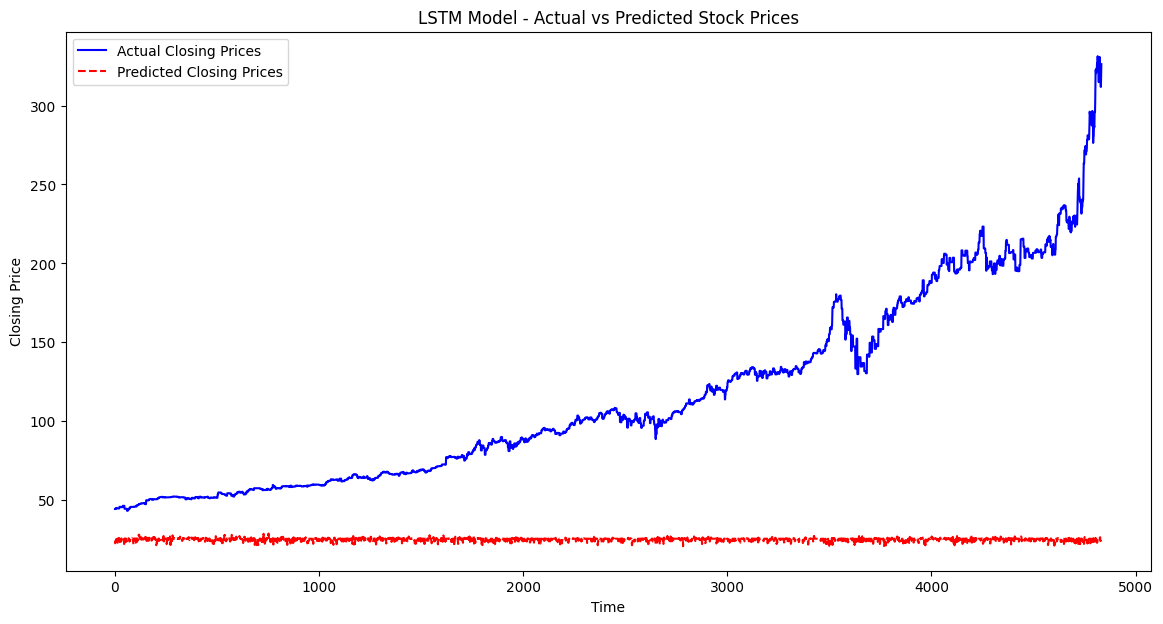

In [5]:

# ------------------------------
# Step 5: Feature Engineering
# ------------------------------
# Add lag features for sentiment scores
merged_data_msft['compound_score_lag1'] = merged_data_msft['compound_score'].shift(1)
merged_data_msft['compound_score_lag2'] = merged_data_msft['compound_score'].shift(2)

# Drop rows with NaN values caused by lagging
merged_data_msft.dropna(inplace=True)

# Define the target and features
features = ['compound_score', 'compound_score_lag1', 'compound_score_lag2']
target = 'Close'  # Predicting the closing price of Microsoft stock

X = merged_data_msft[features].values
y = merged_data_msft[target].values

# ------------------------------
# Step 6: Scale Features and Target
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# ------------------------------
# Step 7: Reshape Data for LSTM
# ------------------------------
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=False)

# Reshape input data to 3D for LSTM [samples, time_steps, features]
X_train = np.expand_dims(X_train, axis=1)  # Adding time_steps=1 for simplicity
X_test = np.expand_dims(X_test, axis=1)

# ------------------------------
# Step 8: Build and Compile LSTM Model
# ------------------------------
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# ------------------------------
# Step 9: Train the LSTM Model
# ------------------------------
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# ------------------------------
# Step 10: Make Predictions
# ------------------------------
predictions = model.predict(X_test)

# ------------------------------
# Step 11: Evaluate Model Performance
# ------------------------------
# Inverse transform predictions and true values for interpretation
X_test_inverse = scaler.inverse_transform(np.hstack((X_test[:, 0, :], np.zeros((X_test.shape[0], 1)))))[:, :-1]  # Inverse transform only the features
predictions_inv = scaler.inverse_transform(np.hstack((X_test[:, 0, :], predictions.reshape(-1, 1))))[:, -1]
y_test_inv = scaler.inverse_transform(np.hstack((X_test[:, 0, :], y_test.reshape(-1, 1))))[:, -1]

# Calculate MSE and MAE
mse_lstm = mean_squared_error(y_test_inv, predictions_inv)
mae_lstm = mean_absolute_error(y_test_inv, predictions_inv)

print(f"LSTM Model MSE: {mse_lstm}")
print(f"LSTM Model MAE: {mae_lstm}")

# ------------------------------
# Step 12: Plot Predictions vs Actual Values
# ------------------------------
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Closing Prices', color='blue')
plt.plot(predictions_inv, label='Predicted Closing Prices', color='red', linestyle='dashed')
plt.title('LSTM Model - Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


C:\Users\vskar\OneDrive\Documents\stockprice_project\my_new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 50)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.1658 - val_loss: 5.6608
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0584 - val_loss: 5.6784
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0529 - val_loss: 5.7357
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0543 - val_loss: 5.6906
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0560 - val_loss: 5.7314
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0512 - val_loss: 5.6801
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0533 - val_loss: 5.6841
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0521 - val_loss: 5.7581
Epoch 9/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0513 - val_loss: 5.6910
Epoch 10/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0558 - val_loss: 5.8029
Epoch 11/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0533 - val_loss: 5.7458
Epoch 12/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

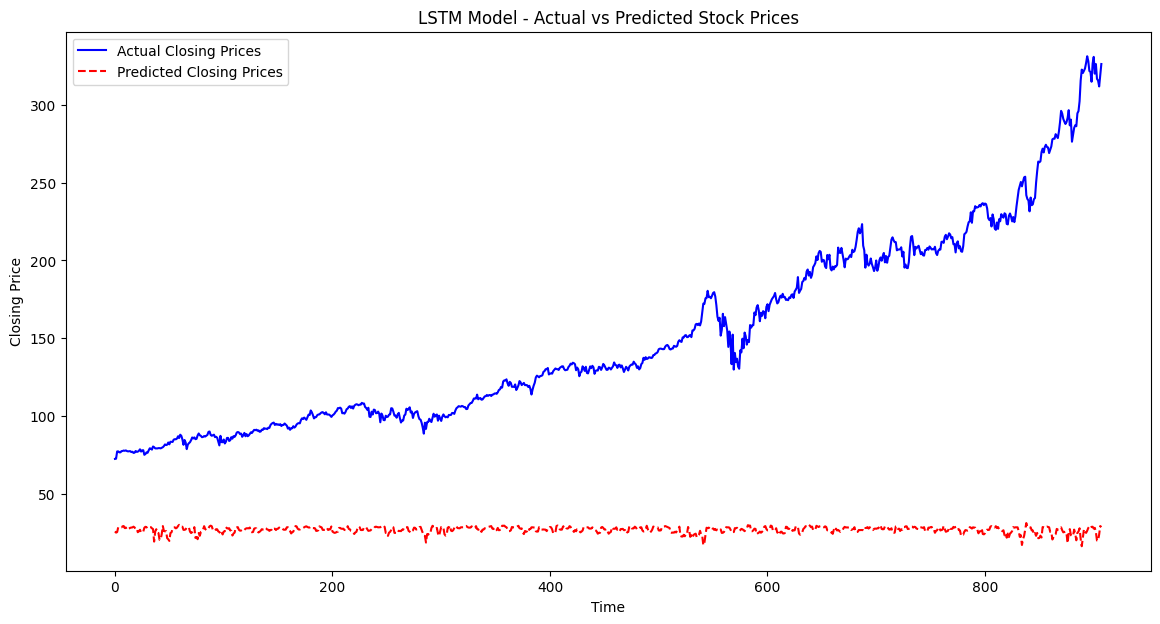

In [3]:
# Define the features and target
features = ['compound_score', 'compound_score_lag1', 'compound_score_lag2']
target = 'Close'

X = merged_data_msft[features].values
y = merged_data_msft[target].values

# Scale features and target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=False)

# Reshape input data for LSTM
X_train = np.expand_dims(X_train, axis=1)  # Adding time_steps=1
X_test = np.expand_dims(X_test, axis=1)

# Define the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and true values
X_test_inverse = scaler.inverse_transform(np.hstack((X_test[:, 0, :], np.zeros((X_test.shape[0], 1)))))[:, :-1]
predictions_inv = scaler.inverse_transform(np.hstack((X_test[:, 0, :], predictions.reshape(-1, 1))))[:, -1]
y_test_inv = scaler.inverse_transform(np.hstack((X_test[:, 0, :], y_test.reshape(-1, 1))))[:, -1]

# Evaluate model
mse_lstm = mean_squared_error(y_test_inv, predictions_inv)
mae_lstm = mean_absolute_error(y_test_inv, predictions_inv)
print(f"LSTM Model MSE: {mse_lstm}")
print(f"LSTM Model MAE: {mae_lstm}")

# Plot predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Actual Closing Prices', color='blue')
plt.plot(predictions_inv, label='Predicted Closing Prices', color='red', linestyle='dashed')
plt.title('LSTM Model - Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


Single-level columns detected in stock data.
Epoch 1/50


C:\Users\vskar\OneDrive\Documents\stockprice_project\my_new_env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


604/604 - 4s - 7ms/step - loss: 0.0253 - mae: 0.1119 - val_loss: 1.0287 - val_mae: 0.8416
Epoch 2/50
604/604 - 1s - 2ms/step - loss: 0.0038 - mae: 0.0476 - val_loss: 0.3849 - val_mae: 0.5348
Epoch 3/50
604/604 - 1s - 2ms/step - loss: 0.0028 - mae: 0.0410 - val_loss: 0.4993 - val_mae: 0.4942
Epoch 4/50
604/604 - 1s - 2ms/step - loss: 0.0021 - mae: 0.0353 - val_loss: 0.8394 - val_mae: 0.5576
Epoch 5/50
604/604 - 1s - 2ms/step - loss: 0.0015 - mae: 0.0299 - val_loss: 0.7761 - val_mae: 0.5408
Epoch 6/50
604/604 - 1s - 2ms/step - loss: 0.0013 - mae: 0.0269 - val_loss: 0.9685 - val_mae: 0.5778
Epoch 7/50
604/604 - 1s - 2ms/step - loss: 0.0011 - mae: 0.0249 - val_loss: 1.7265 - val_mae: 0.7235
Epoch 8/50
604/604 - 1s - 2ms/step - loss: 0.0011 - mae: 0.0239 - val_loss: 5.0639 - val_mae: 1.2029
Epoch 9/50
604/604 - 1s - 2ms/step - loss: 0.0010 - mae: 0.0229 - val_loss: 8.2120 - val_mae: 1.5605
Epoch 10/50
604/604 - 1s - 2ms/step - loss: 9.8177e-04 - mae: 0.0223 - val_loss: 14.0118 - val_mae: 2.

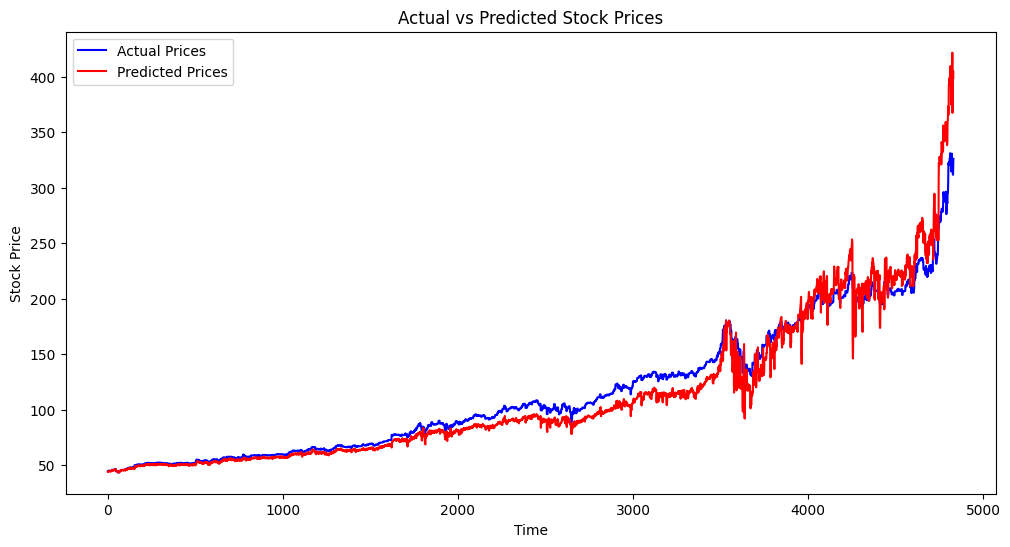

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import yfinance as yf

# ------------------------------
# Step 1: Set Parameters and Load Data
# ------------------------------

# Define date range
start_date = '2003-01-01'
end_date = '2021-12-31'

# Fetch stock data for Microsoft
msft = yf.Ticker('MSFT')
stock_data_msft = msft.history(start=start_date, end=end_date)

# Check for multi-level columns
if isinstance(stock_data_msft.columns, pd.MultiIndex):
    print("Multi-level columns detected in stock data. Flattening columns...")
    stock_data_msft.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in stock_data_msft.columns]
else:
    print("Single-level columns detected in stock data.")

# Preprocess stock data
stock_data_msft.index = stock_data_msft.index.tz_localize(None)
stock_data_msft.reset_index(inplace=True)
stock_data_msft['Date'] = pd.to_datetime(stock_data_msft['Date'])

# Load news sentiment data
news_data = pd.read_csv('cleaned_business_news_with_vader.csv')
news_data['publish_date'] = pd.to_datetime(news_data['publish_date'], errors='coerce')
news_data['compound_score'] = news_data['compound_score'].fillna(0)

# Merge stock data with news data
merged_data_msft = pd.merge(stock_data_msft, news_data, left_on='Date', right_on='publish_date', how='inner')

# ------------------------------
# Step 2: Feature Engineering
# ------------------------------

# Add lag features for sentiment scores
merged_data_msft['compound_score_lag1'] = merged_data_msft['compound_score'].shift(1)
merged_data_msft['compound_score_lag2'] = merged_data_msft['compound_score'].shift(2)

# Add stock-specific features
merged_data_msft['price_change'] = merged_data_msft['Close'] - merged_data_msft['Open']
merged_data_msft['percentage_change'] = (merged_data_msft['Close'] - merged_data_msft['Open']) / merged_data_msft['Open']
merged_data_msft['rolling_mean'] = merged_data_msft['Close'].rolling(window=5).mean()
merged_data_msft['rolling_std'] = merged_data_msft['Close'].rolling(window=5).std()

# Drop rows with NaN values introduced by lagging and rolling calculations
merged_data_msft.dropna(inplace=True)

# Define features and target
features = ['compound_score', 'compound_score_lag1', 'compound_score_lag2', 
            'price_change', 'percentage_change', 'rolling_mean', 'rolling_std']
target = 'Close'

# ------------------------------
# Step 3: Preprocess Data
# ------------------------------

# Extract features and target
X = merged_data_msft[features].values
y = merged_data_msft[target].values

# Scale features and target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).flatten()

# Reshape X for LSTM (samples, timesteps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into train-test sets
train_size = int(0.8 * X_lstm.shape[0])
X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# ------------------------------
# Step 4: Build and Train LSTM Model
# ------------------------------

# Define LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Single output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# ------------------------------
# Step 5: Evaluate Model
# ------------------------------

# Make predictions
predictions = model.predict(X_test)

# Inverse scale predictions and true values
X_test_features = X_test[:, 0, :]
predictions_inv = scaler.inverse_transform(np.hstack((X_test_features, predictions.reshape(-1, 1))))[:, -1]
y_test_inv = scaler.inverse_transform(np.hstack((X_test_features, y_test.reshape(-1, 1))))[:, -1]

# Calculate metrics
mse_lstm = mean_squared_error(y_test_inv, predictions_inv)
mae_lstm = mean_absolute_error(y_test_inv, predictions_inv)

print(f"Mean Squared Error (MSE): {mse_lstm}")
print(f"Mean Absolute Error (MAE): {mae_lstm}")

# ------------------------------
# Step 6: Visualize Predictions
# ------------------------------

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(predictions_inv, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
